In [19]:
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime

In [20]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
# read data
data=pd.read_csv("Group_5_Tesla_stock_data.csv", header=0)
data=data.dropna()

# add year collumn
data['Year'] = pd.to_datetime(data['Date']).dt.year

print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
5     2010-07-07   16.400000   16.629999   14.980000   15.800000   15.800000   
6     2010-07-08   16.139999   17.520000   15.570000   17.459999   17.459999   
7     2010-07-09   17.580000   17.900000   16.549999   17.400000   17.400000   
8     2010-07-12   17.950001   18.070000   17.000000   17.049999   17.049999   
9     2010-07-13   17.389999   18.639999   16.900000   18.139999   18.139999   
10    2010-07-14   17.940001   20.150000   17.760000   19.840000   19.840000   
11    2010-07-15   19.940001   21.500000

In [22]:
data.dtypes
print(len(data['Open']))

2416


In [23]:
dif_count = 0
for i in range (len(data['Date'])):
    if data['Close'][i] != data['Adj Close'][i]:
        dif_count = dif_count + 1
print(dif_count)

0


In [24]:
def Candlestick_plot(l):   
    open_data = []
    high_data = []
    low_data = []
    close_data = []
    volume_data = []

    for i in range(l):
        open_data.append(data['Open'][i])
        high_data.append(data['High'][i])
        low_data.append(data['Low'][i])
        close_data.append(data['Close'][i])
        volume_data.append(data['Volume'][i])

    fig = go.Figure(data=go.Candlestick(x=data['Date'],
                    open=open_data,
                    high=high_data,
                    low=low_data,
                    close=close_data))
    
    fig.update_layout(
        title='Tesla Stock Candlestick (2010-2020)',
        yaxis_title='Tesla Stock',
        shapes = [dict(
            x0='2013-05-01', x1='2013-11-01', y0=0, y1=1, xref='x', yref='paper',
            line_width=2)],
        annotations=[dict(
            x='2013-11-01', y=1.0, xref='x', yref='paper',
            showarrow=False, xanchor='left', text='Significant trend around 2013')]
    )
    
    fig.show()
    
# Candlestick_plot(20)    
Candlestick_plot(len(data['Open']))

In [25]:
def Candlestick_plot_by_year(year):
    open_data = []
    high_data = []
    low_data = []
    close_data = []
    volume_data = []
    date_data = []

    for i in range(len(data['Open'])):
        date = data['Date'][i].split('-')
        date_y = int(date[0])
        date_m = int(date[1])
        date_d = int(date[2])
        if (date_y == year):
            open_data.append(data['Open'][i])
            high_data.append(data['High'][i])
            low_data.append(data['Low'][i])
            close_data.append(data['Close'][i])
            volume_data.append(data['Volume'][i])
            date_data.append(data['Date'][i])

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(go.Candlestick(x=date_data,
                    open=open_data,
                    high=high_data,
                    low=low_data,
                    close=close_data),
                 row=1, col=1)
    
    fig.add_trace(go.Bar(
                    x=date_data,
                    y=volume_data,
                    marker_color='red'),
                 row=2, col=1)
    
    fig.update_layout(
        title='Tesla Stock Data - Candlestick %d' % year,
        yaxis_title='Tesla %d Stock' % year,
        showlegend=False,
        shapes = [dict(
            x0='2013-05-01', x1='2013-11-01', y0=0, y1=1, xref='x', yref='paper',
            line_width=2)],
        annotations=[dict(
            x='2013-11-01', y=1.05, xref='x', yref='paper',
            showarrow=False, xanchor='right', text='The Significant trend is between May 2013 & Nov 2013')]
    )
    
    fig.show()
    
# Candlestick_plot_by_year(2010)
# Candlestick_plot_by_year(2011)
# Candlestick_plot_by_year(2012)
# Candlestick_plot_by_year(2013)
# Candlestick_plot_by_year(2014)
# Candlestick_plot_by_year(2015)
Candlestick_plot_by_year(2016)
# Candlestick_plot_by_year(2017)
# Candlestick_plot_by_year(2018)
# Candlestick_plot_by_year(2019)
# Candlestick_plot_by_year(2020)

In [26]:
def Candlestick_plot_by_month_and_year(month_list, year):
    open_data = []
    high_data = []
    low_data = []
    close_data = []
    volume_data = []
    date_data = []

    for i in range(len(data['Open'])):
        date = data['Date'][i].split('-')
        date_y = int(date[0])
        date_m = int(date[1])
        date_d = int(date[2])
        if (date_y == year and date_m in month_list):
            open_data.append(data['Open'][i])
            high_data.append(data['High'][i])
            low_data.append(data['Low'][i])
            close_data.append(data['Close'][i])
            volume_data.append(data['Volume'][i])
            date_data.append(data['Date'][i])

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(go.Candlestick(x=date_data,
                    open=open_data,
                    high=high_data,
                    low=low_data,
                    close=close_data),
                 row=1, col=1)
    
    fig.add_trace(go.Bar(
                    x=date_data,
                    y=volume_data,
                    marker_color='black'),
                 row=2, col=1)
    title = ''
    for i in range(len(month_list)):
        title = title + '%s'
    
    fig.update_layout(
        title='Tesla Stock Data - Candlestick - Between %d/%d And %d/%d' % (min(month_list), year, max(month_list), year),
        yaxis_title='Tesla %d Stock' % year,
        showlegend=False,
#         shapes = [dict(
#             x0='2013-05-10', x1='2013-05-10', y0=0, y1=1, xref='x', yref='paper',
#             line_width=1), dict(
#             x0='2013-05-14', x1='2013-05-14', y0=0, y1=1, xref='x', yref='paper',
#             line_width=1), dict(
#             x0='2013-07-16', x1='2013-07-16', y0=0, y1=1, xref='x', yref='paper',
#             line_width=1)],
#         annotations=[dict(
#             x='2013-05-10', y=1.0, xref='x', yref='paper',
#             showarrow=False, xanchor='left', text='Uptrend here & go read the news (May 10)'), dict(
#             x='2013-05-14', y=0.85, xref='x', yref='paper',
#             showarrow=False, xanchor='left', text='This is a good day to buy (May 14)'), dict(
#             x='2013-07-16', y=1.05, xref='x', yref='paper',
#             showarrow=False, xanchor='left', text='This is a good day to buy (Jul 16)')]
    )
    
    fig.show()
    
# Example
Candlestick_plot_by_month_and_year([1, 2, 3, 4, 5, 6], 2016)

Year
2010     205369100
2011     325235100
2012     307449000
2013    2118745900
2014    1742321300
2015    1088217800
2016    1162361700
2017    1590031400
2018    2161638800
2019    2308042000
2020     454283500
Name: Volume, dtype: int64


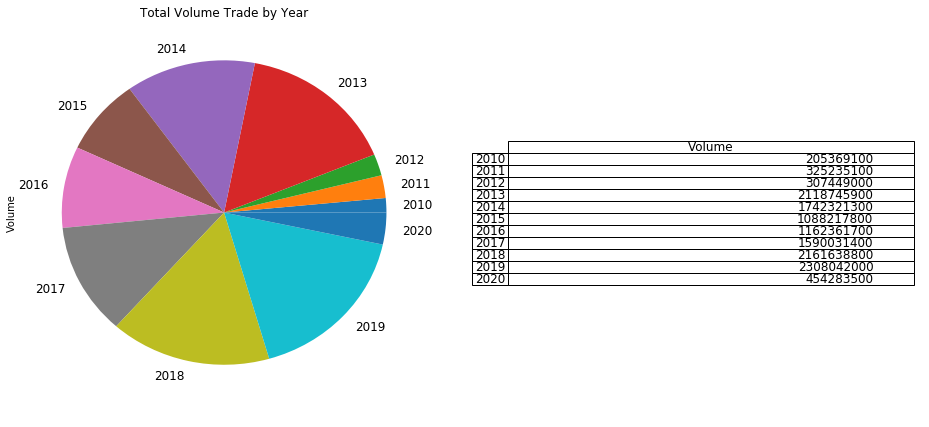

In [27]:
total_volume_by_year = data.groupby('Year')['Volume'].sum()
# total_volume_by_year = pd.DataFrame(total_volume_by_year)
print(total_volume_by_year)

plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
total_volume_by_year.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume Trade by Year", ax = ax1)

ax2 = plt.subplot(122)
plt.axis('off') 
tbl = table(ax2, total_volume_by_year, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()